In [41]:
import pandas as pd
df = pd.read_csv('iris.data.txt')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.shape

(149, 5)

In [42]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [43]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [44]:
# compute covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [45]:
# engenvector and engienvalues
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[ 2.92442837  0.93215233  0.14946373  0.02098259]


In [46]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.92442836911
0.932152330254
0.149463734898
0.0209825927643


In [29]:
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)    
    EV_List = pca.explained_variance_  
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.4):  
            print 'Recommend %d:' %j
            return j    
getncomponent(X_std)

Recommend 1:


1

In [30]:
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)    
    EV_List = pca.explained_variance_  
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.3):  
            print 'Recommend %d:' %j
            return j    
getncomponent(X_std)

Recommend 2:


2

In [31]:
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)    
    EV_List = pca.explained_variance_  
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.2):  
            print 'Recommend %d:' %j
            return j    
getncomponent(X_std)

Recommend 2:


2

In [12]:
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)    
    EV_List = pca.explained_variance_  
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.1):  
            print 'Recommend %d:' %j
            return j    
getncomponent(X_std)

Recommend 2:


2

In [24]:
from sklearn.decomposition import PCA
def getncomponent(inputdata):
    pca = PCA()  
    pca.fit(inputdata)    
    EV_List = pca.explained_variance_  
    EVR_List = []  
    for j in range(len(EV_List)):  
        EVR_List.append(EV_List[j]/EV_List[0])  
    for j in range(len(EVR_List)):  
        if(EVR_List[j]<0.05):  
            print 'Recommend %d:' %j
            return j    
getncomponent(X_std)

Recommend 3:


3

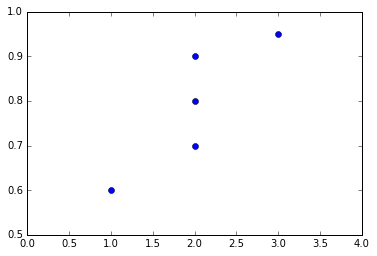

In [35]:
import numpy as np
import pandas as pd
explained_variance=np.array([0.6,0.7,0.8,0.9,0.95])
n_components=np.array([1,2,2,2,3])
df_pca=pd.DataFrame(explained_variance, columns=['explained_variance'])
df_pca['n_components']=n_components
import matplotlib.pyplot as plt 
plt.plot(df_pca['n_components'],df_pca['explained_variance'], "o")
plt.ylim(0.5, 1)
plt.xlim(0, 4.0)
plt.show()

In [36]:
pca = PCA(n_components=2)  
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# loading at each principal component
pca.components_

array([[ 0.52308496, -0.25956935,  0.58184289,  0.56609604],
       [ 0.36956962,  0.92681168,  0.01912775,  0.06381646]])

In [38]:
# Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([ 0.72620033,  0.23147407])

In [40]:
# The average of each original feature.
pca.mean_ 

array([  2.38437160e-16,   2.38437160e-17,  -9.53748639e-17,
        -1.43062296e-16])

In [39]:
# Apply PCA to the data set
data_pca = pca.transform(X_std)
data_pca

array([[-2.10795032, -0.64427554],
       [-2.38797131, -0.30583307],
       [-2.32487909, -0.56292316],
       [-2.40508635,  0.687591  ],
       [-2.08320351,  1.53025171],
       [-2.4636848 ,  0.08795413],
       [-2.25174963,  0.25964365],
       [-2.3645813 , -1.08255676],
       [-2.20946338, -0.43707676],
       [-2.17862017,  1.08221046],
       [-2.34525657,  0.17122946],
       [-2.24590315, -0.6974389 ],
       [-2.66214582, -0.92447316],
       [-2.2050227 ,  1.90150522],
       [-2.25993023,  2.73492274],
       [-2.21591283,  1.52588897],
       [-2.20705382,  0.52623535],
       [-1.9077081 ,  1.4415791 ],
       [-2.35411558,  1.17088308],
       [-1.93202643,  0.44083479],
       [-2.21942518,  0.96477499],
       [-2.79116421,  0.50421849],
       [-1.83814105,  0.11729122],
       [-2.24572458,  0.17450151],
       [-1.97825353, -0.59734172],
       [-2.06935091,  0.27755619],
       [-2.18514506,  0.56366755],
       [-2.15824269,  0.34805785],
       [-2.28843932,